# Exercici 1
Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" (fes una còpia i executa els comandaments amb el mateix dataset county.txt). Aquest exercici consisteix a observar les diferents possibilitats que ofereixen les diferents llibreries de visualització gràfica.

# Exercici 2
* Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.

* El resultat final ha de ser un dataframe amb les variables de nom de la pel·lícula, any i genere. També és important quedar-se amb un sol gènere per a cada pel·lícula!

In [460]:
import numpy as np
import pandas as pd

In [461]:
encabezados = ['movie_id', 'titol', 'genere']
movies = pd.read_csv('C:\\RAUL\\NISSAN\\GENERAL\\USB\\FORMACION\\BootCamp - Data Scientist_Analist\\IT Academy Cibernarium - Data Science\\Data Science Itinerario\\4.- Visualitzación gráfica de datos\\Entrega\\movies.dat', sep="::", engine ='python', names=encabezados)
movies.head()

,movie_id,titol,genere
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [462]:
#dividim la columna de genere en 2 per agafar només la primera
movies[['gen1', 'gen2']]=movies['genere'].str.split('|',n=1, expand=True) 


In [463]:
movies.drop(columns=['genere', 'gen2'], inplace=True) # esborrem les columnes que no volem
movies.rename(columns = {'gen1':'genere'}, inplace = True)


In [464]:
# creem la columna Any a partir de la columna titol i esborrem els parentesis
movies['Any']=movies['titol'].str.slice(start=-6)
movies['Any']=movies['Any'].str.replace("(","", regex=True)
movies['Any']=movies['Any'].str.replace(")","", regex=True)

In [465]:
# creem la columna titol sense agafar l'any
movies['titol']=movies['titol'].str.slice(start=0, stop=-6)
movies.set_index('movie_id', inplace=True)
movies.head()

,titol,genere,Any
movie_id,,,
1,Toy Story,Animation,1995
2,Jumanji,Adventure,1995
3,Grumpier Old Men,Comedy,1995
4,Waiting to Exhale,Comedy,1995
5,Father of the Bride Part II,Comedy,1995


In [466]:
movies['Any'] = movies['Any'].astype(int)

In [467]:
print(movies['genere'].sort_values().unique()) #el genere Drama" s'ha de renombrar

['Action' 'Adventure' 'Animation' "Children's" 'Comedy' 'Crime'
 'Documentary' 'Drama' 'Fantasy' 'Film-Noir' 'Horror' 'Musical' 'Mystery'
 'Romance' 'Sci-Fi' 'Thriller' 'War' 'Western']


In [468]:
movies['genere']=movies['genere'].str.replace('Drama"','Drama', regex=True)

In [469]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3883 entries, 1 to 3952
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   titol   3883 non-null   object
 1   genere  3883 non-null   object
 2   Any     3883 non-null   int32 
dtypes: int32(1), object(2)
memory usage: 106.2+ KB


In [470]:
movies.isnull().sum()

titol     0
genere    0
Any       0
dtype: int64

In [471]:
movies.describe(include='all').round(2)

,titol,genere,Any
count,3883,3883,3883.00
unique,3841,18,NaN
top,Hamlet,Drama,NaN
freq,5,1176,NaN
mean,NaN,NaN,1986.07
std,NaN,NaN,16.90
min,NaN,NaN,1919.00
25%,NaN,NaN,1982.00
50%,NaN,NaN,1994.00
75%,NaN,NaN,1997.00


# Exercici 3
* Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?
* Fes una o dues representacions gràfiques i justifica la teva elecció.

_He fet 3 gràfiques, les 2 primeres per veure la evolució del nombre de pelicules en funció de l'any i en funció del genere.
La última gràfica es per veure si hi ha alguna evolució diferent per les 5 categories amb més pelicules._

In [472]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

df_Anys=movies['Any']
df_Anys = df_Anys.value_counts().rename_axis('Any').reset_index(name='N_pelicules')

df_genere=movies['genere']
df_genere = df_genere.value_counts().rename_axis('genere').reset_index(name='N_pelicules')

[Text(0, 0, 'Drama'),
 Text(1, 0, 'Comedy'),
 Text(2, 0, 'Action'),
 Text(3, 0, 'Horror'),
 Text(4, 0, 'Adventure'),
 Text(5, 0, 'Crime'),
 Text(6, 0, 'Documentary'),
 Text(7, 0, 'Thriller'),
 Text(8, 0, 'Animation'),
 Text(9, 0, "Children's"),
 Text(10, 0, 'Romance'),
 Text(11, 0, 'Sci-Fi'),
 Text(12, 0, 'Mystery'),
 Text(13, 0, 'Western'),
 Text(14, 0, 'Film-Noir'),
 Text(15, 0, 'Musical'),
 Text(16, 0, 'War'),
 Text(17, 0, 'Fantasy')]

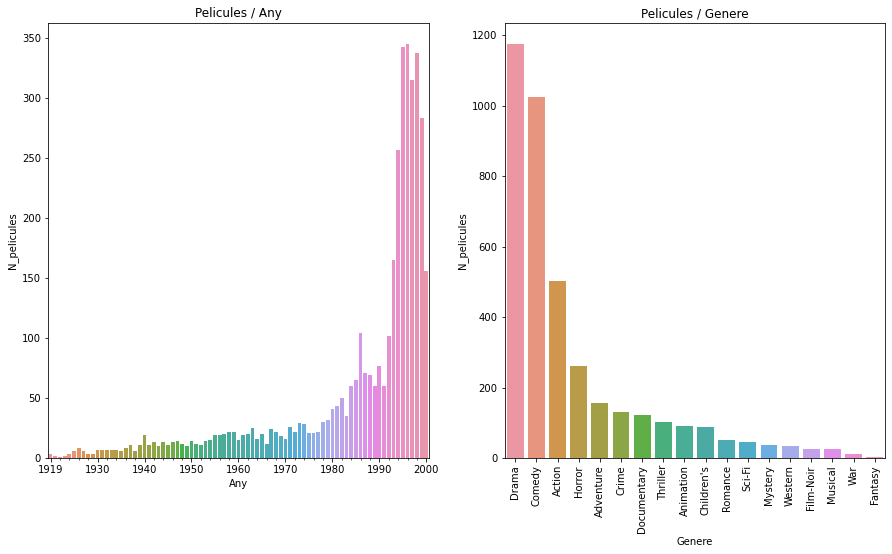

In [473]:
f, axes = plt.subplots(1, 2, figsize=(15, 8))

ax0=sns.barplot(data=df_Anys, x="Any", y='N_pelicules',  ax=axes[0])
ax0.set(xlabel='Any', ylabel='N_pelicules')
ax0.set_title("Pelicules / Any")
ax0.xaxis.set_major_locator(ticker.AutoLocator())
ax0.xaxis.set_minor_locator(ticker.AutoMinorLocator())

ax1=sns.barplot(data=df_genere, x="genere", y="N_pelicules", ax=axes[1])
ax1.set(xlabel='Genere', ylabel='N_pelicules')
ax1.set_title("Pelicules / Genere")    
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

In [474]:
dummies = pd.get_dummies(movies['genere'], prefix = 'cod')
movies_amb_dummies = movies.join(dummies)
top_movies=movies_amb_dummies[['genere','Any', 'cod_Drama', 'cod_Comedy', 'cod_Action', 'cod_Horror', 'cod_Adventure']]
top_movies

,genere,Any,cod_Drama,cod_Comedy,cod_Action,cod_Horror,cod_Adventure
movie_id,,,,,,,
1,Animation,1995,0,0,0,0,0
2,Adventure,1995,0,0,0,0,1
3,Comedy,1995,0,1,0,0,0
4,Comedy,1995,0,1,0,0,0
5,Comedy,1995,0,1,0,0,0
...,...,...,...,...,...,...,...
3948,Comedy,2000,0,1,0,0,0
3949,Drama,2000,1,0,0,0,0
3950,Drama,2000,1,0,0,0,0


In [475]:
movies_amb_dummies.corr()

,Any,cod_Action,cod_Adventure,cod_Animation,cod_Children's,cod_Comedy,cod_Crime,cod_Documentary,cod_Drama,cod_Fantasy,cod_Film-Noir,cod_Horror,cod_Musical,cod_Mystery,cod_Romance,cod_Sci-Fi,cod_Thriller,cod_War,cod_Western
Any,1.000000,0.064661,-0.055707,-0.030397,-0.001422,0.076610,-0.006651,0.087806,0.039754,-0.000762,-0.130501,-0.097514,-0.123258,-0.058282,0.013610,-0.074969,-0.019037,-0.041693,-0.108313
cod_Action,0.064661,1.000000,-0.078660,-0.059423,-0.059084,-0.230871,-0.072083,-0.069772,-0.254264,-0.008757,-0.031054,-0.103768,-0.031054,-0.037318,-0.044060,-0.042239,-0.063041,-0.021479,-0.035715
cod_Adventure,-0.055707,-0.078660,1.000000,-0.031409,-0.031230,-0.122031,-0.038101,-0.036880,-0.134396,-0.004629,-0.016414,-0.054848,-0.016414,-0.019725,-0.023289,-0.022326,-0.033322,-0.011353,-0.018878
cod_Animation,-0.030397,-0.059423,-0.031409,1.000000,-0.023593,-0.092188,-0.028783,-0.027860,-0.101529,-0.003497,-0.012400,-0.041435,-0.012400,-0.014901,-0.017593,-0.016866,-0.025173,-0.008576,-0.014261
cod_Children's,-0.001422,-0.059084,-0.031230,-0.023593,1.000000,-0.091662,-0.028619,-0.027702,-0.100950,-0.003477,-0.012329,-0.041199,-0.012329,-0.014816,-0.017493,-0.016770,-0.025029,-0.008528,-0.014180
cod_Comedy,0.076610,-0.230871,-0.122031,-0.092188,-0.091662,1.000000,-0.111827,-0.108243,-0.394460,-0.013586,-0.048176,-0.160983,-0.048176,-0.057894,-0.068353,-0.065528,-0.097801,-0.033321,-0.055408
cod_Crime,-0.006651,-0.072083,-0.038101,-0.028783,-0.028619,-0.111827,1.000000,-0.033796,-0.123158,-0.004242,-0.015042,-0.050262,-0.015042,-0.018076,-0.021341,-0.020459,-0.030535,-0.010404,-0.017299
cod_Documentary,0.087806,-0.069772,-0.036880,-0.027860,-0.027702,-0.108243,-0.033796,1.000000,-0.119212,-0.004106,-0.014560,-0.048651,-0.014560,-0.017496,-0.020657,-0.019803,-0.029557,-0.010070,-0.016745
cod_Drama,0.039754,-0.254264,-0.134396,-0.101529,-0.100950,-0.394460,-0.123158,-0.119212,1.000000,-0.014962,-0.053058,-0.177295,-0.053058,-0.063760,-0.075279,-0.072168,-0.107711,-0.036698,-0.061022
cod_Fantasy,-0.000762,-0.008757,-0.004629,-0.003497,-0.003477,-0.013586,-0.004242,-0.004106,-0.014962,1.000000,-0.001827,-0.006106,-0.001827,-0.002196,-0.002593,-0.002486,-0.003710,-0.001264,-0.002102


In [476]:
# Fem una taula dinàmica per poder veure les pelicules rodades per cada any i cadascuna de les categories
df_pvt=movies[['genere','Any']]
pivotTable = df_pvt.pivot_table(index= "Any", columns= "genere", values="genere", aggfunc= 'size', fill_value=0)

In [477]:
pivotTable.reset_index()

genere,Any,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1919,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1920,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1921,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1922,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,1923,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,1996,37,10,6,8,101,18,19,118,0,0,7,0,2,12,2,4,1,0
77,1997,43,10,4,11,83,17,10,100,0,0,7,0,4,11,5,10,0,0
78,1998,44,8,7,7,94,15,18,116,0,2,12,0,2,6,1,5,0,0
79,1999,27,1,7,4,93,8,15,103,0,0,9,0,2,3,1,10,0,0


In [478]:
pivotTable.drop(columns=['Animation', "Children's", 'Crime',
       'Documentary', 'Fantasy', 'Film-Noir', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], inplace=True)

In [479]:
pivotTable

genere,Action,Adventure,Comedy,Drama,Horror
Any,,,,,
1919,1,1,1,0,0
1920,0,0,2,0,0
1921,1,0,0,0,0
1922,0,0,0,1,1
1923,0,0,2,1,0
...,...,...,...,...,...
1996,37,10,101,118,7
1997,43,10,83,100,7
1998,44,8,94,116,12


Text(0.5, 1.0, 'Evolució Anual Top5 Genere')

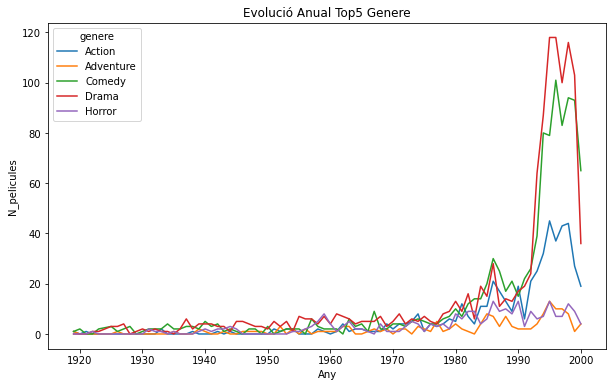

In [480]:
ax3=pivotTable.plot(kind='line', figsize=(10, 6))
ax3.set(xlabel='Any', ylabel='N_pelicules')
ax3.set_title("Evolució Anual Top5 Genere")    